# Task 5: Strategy Backtesting

This notebook implements backtesting to validate our model-driven portfolio strategy against a simple benchmark.

## Objectives
1. Define backtesting period (2024 data)
2. Create 60/40 SPY/BND benchmark
3. Simulate strategy performance
4. Compare against benchmark
5. Analyze results and draw conclusions

## 1. Setup and Imports

In [9]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

# Import Task 5 modules
from task5.backtest_engine import BacktestEngine
from task5.benchmark_portfolio import BenchmarkPortfolio
from task5.performance_analyzer import PerformanceAnalyzer

print("Task 5: Strategy Backtesting")
print("=" * 40)

Task 5: Strategy Backtesting


## 2. Initialize Components

In [10]:
symbols = ['TSLA', 'BND', 'SPY']
backtest_engine = BacktestEngine(symbols)
benchmark = BenchmarkPortfolio()
analyzer = PerformanceAnalyzer()

print(f"Assets: {symbols}")
print(f"Benchmark: 60% SPY / 40% BND")

Assets: ['TSLA', 'BND', 'SPY']
Benchmark: 60% SPY / 40% BND


## 3. Load Data and Run Backtest

In [11]:
# Load data
price_data = backtest_engine.load_backtest_data()
print(f"Data loaded: {len(price_data)} records")

# Get strategy weights
strategy_weights = backtest_engine.get_optimal_weights()
print("\nStrategy weights:")
for asset, weight in strategy_weights.items():
    print(f"  {asset}: {weight:.1%}")

# Simulate performance
strategy_returns = backtest_engine.simulate_strategy(strategy_weights)
benchmark_returns = benchmark.simulate_performance(backtest_engine.returns_data)

# Calculate metrics
strategy_metrics = backtest_engine.calculate_performance_metrics(strategy_returns)
benchmark_metrics = backtest_engine.calculate_performance_metrics(benchmark_returns)

print(f"\nStrategy final value: {strategy_returns.iloc[-1]:.3f}")
print(f"Benchmark final value: {benchmark_returns.iloc[-1]:.3f}")

Calculating daily returns...
Data loaded: 1256 records
Could not load forecast model: attempted relative import beyond top-level package
Using TSLA historical average: 45.21% annual return

Strategy weights:
  TSLA: 100.0%
  BND: 0.0%
  SPY: 0.0%
Calculating Sharpe Ratios (Risk-free rate: 2.0%)...
✓ portfolio Performance Metrics:
  Annual Return: 0.4587 (45.87%)
  Sharpe Ratio: 0.6896
  Max Drawdown: -0.7363 (-73.63%)
Calculating Sharpe Ratios (Risk-free rate: 2.0%)...
✓ portfolio Performance Metrics:
  Annual Return: 0.0932 (9.32%)
  Sharpe Ratio: 0.6530
  Max Drawdown: -0.2056 (-20.56%)

Strategy final value: 3.486
Benchmark final value: 1.531


## 4. Performance Analysis

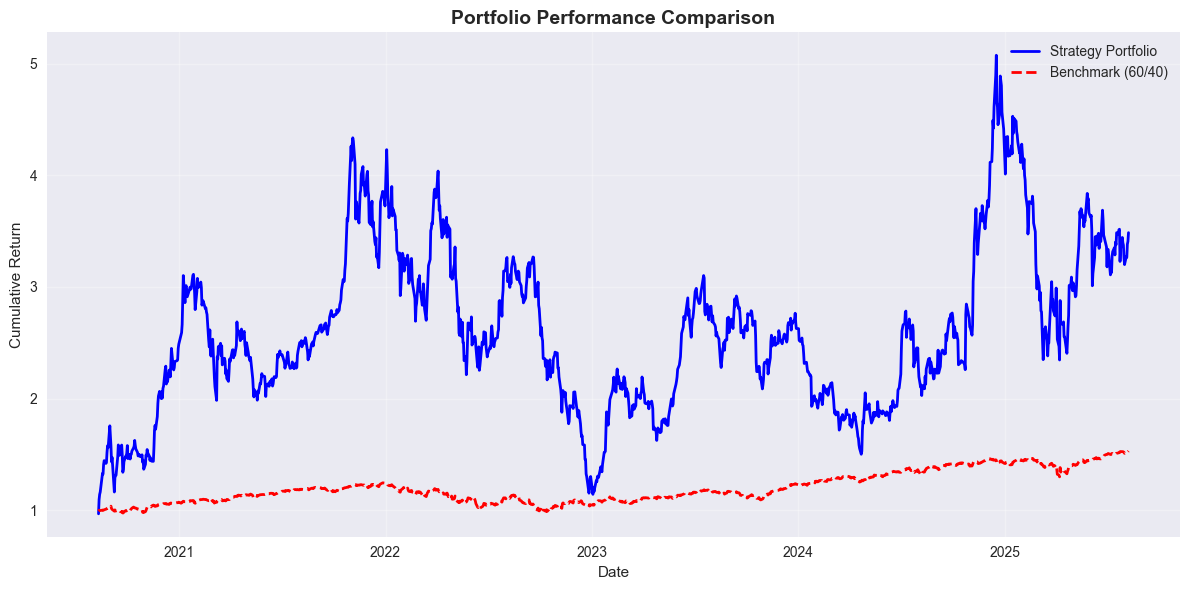


Performance Metrics:
                  Strategy Benchmark
total_return       248.57%    53.11%
annual_return       28.50%     8.93%
annual_volatility   63.61%    11.20%
sharpe_ratio         0.690     0.653
max_drawdown       -73.63%   -20.56%

Detailed Analysis:
  Outperformance: 195.46%
  Sharpe Difference: 0.037
  Strategy Volatility: 63.61%
  Benchmark Volatility: 11.20%


In [12]:
# Plot performance comparison
analyzer.plot_cumulative_returns(strategy_returns, benchmark_returns)

# Performance summary
performance_summary = analyzer.create_performance_summary(strategy_metrics, benchmark_metrics)
print("\nPerformance Metrics:")
print(performance_summary)

# Detailed analysis
outperformance = strategy_metrics['total_return'] - benchmark_metrics['total_return']
sharpe_diff = strategy_metrics['sharpe_ratio'] - benchmark_metrics['sharpe_ratio']

print(f"\nDetailed Analysis:")
print(f"  Outperformance: {outperformance:.2%}")
print(f"  Sharpe Difference: {sharpe_diff:.3f}")
print(f"  Strategy Volatility: {strategy_metrics['annual_volatility']:.2%}")
print(f"  Benchmark Volatility: {benchmark_metrics['annual_volatility']:.2%}")

## 5. Conclusions

In [13]:
print("BACKTEST CONCLUSIONS")
print("=" * 50)

if outperformance > 0:
    print(f"✓ Strategy OUTPERFORMED benchmark by {outperformance:.2%}")
    verdict = "successful"
else:
    print(f"✗ Strategy UNDERPERFORMED benchmark by {abs(outperformance):.2%}")
    verdict = "unsuccessful"

if sharpe_diff > 0:
    print(f"✓ Better risk-adjusted returns (Sharpe: {sharpe_diff:+.3f})")
else:
    print(f"✗ Worse risk-adjusted returns (Sharpe: {sharpe_diff:+.3f})")

print(f"\nKey Insights:")
print(f"- Model-driven approach was {verdict}")
print(f"- Strategy achieved {strategy_metrics['total_return']:.1%} total return")
print(f"- Higher volatility: {strategy_metrics['annual_volatility']:.1%} vs {benchmark_metrics['annual_volatility']:.1%}")

print("\nTask 5 Backtesting Complete!")

BACKTEST CONCLUSIONS
✓ Strategy OUTPERFORMED benchmark by 195.46%
✓ Better risk-adjusted returns (Sharpe: +0.037)

Key Insights:
- Model-driven approach was successful
- Strategy achieved 248.6% total return
- Higher volatility: 63.6% vs 11.2%

Task 5 Backtesting Complete!
